**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving an idea of where the model is getting confused.

In [3]:
# Import relevant library
import pandas as pd
import numpy as np

# Import csv file with Heart Disease data
heart_disease = pd.read_csv('_Data/heart_disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed so that the results are reproduceable
np.random.seed(42)

# Create data sets
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Instantiate RandomForestClassifier and fit the model with 5 different versions(learn the patterns)
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [5]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predict 0 when truth is 1

In [7]:
# Import relevant library
from sklearn.model_selection import train_test_split

# Split data into training (80%) and test (20%) data sets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [8]:
# Import ROC curve from Scikit-Learn
from sklearn.metrics import roc_curve

# Fit the model to the data 
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [9]:
# Return column 1
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [10]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

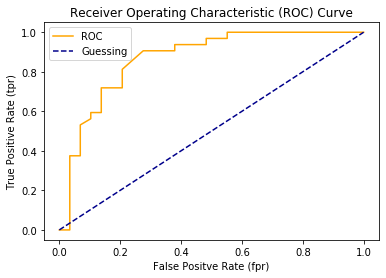

In [11]:
# Import relevant library
import matplotlib.pyplot as plt

# Create a function that plots ROC curves
def plot_roc_curve(fpr, tpr):
    """
    Plot a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the plot
    plt.xlabel('False Positve Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [12]:
# Import relevant library
from sklearn.metrics import roc_auc_score

# Determine Area Under the Curve (AUC) of the ROC curve
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

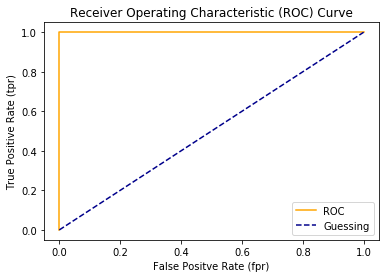

In [13]:
# Plot perfect ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [14]:
# Perfect AUC score (1.0)..which would raise a flag that something is wrong
# NO MODEL IS EVER PERFECT
roc_auc_score(y_test, y_test)

1.0

In [15]:
# Import relevant libraries
from sklearn.metrics import confusion_matrix

# Create a confusion matrix by making predictions
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [16]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames = ['Actual Labels'],
            colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [29]:
# Import relevant library
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

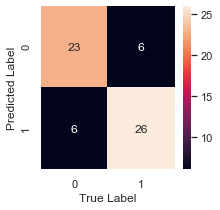

In [30]:
# Create a function that plots the confusion matrix of a model
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matric using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True,    # Annotate the boxes with conf_mat info
                     cbar = True)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label');
    
    # Fix the broken annotations (due to Matplotlib 3.1.1 update)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(conf_mat)